In [6]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
model = joblib.load('dtc.joblib')

In [8]:
data = pd.read_csv(r'collectedData.csv')

In [9]:
data.head()

,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate
0,19,120,80,98,70
1,25,110,89,98,77
2,48,120,80,98,88
3,15,120,80,98,70
4,50,140,90,98,90


In [13]:
npdata = data.values

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(npdata)

In [28]:
predictions = model.predict(x)

# Print the predictions
print(predictions)

[1 1 0 1 0 1 1 0 2 1 1 1 0 0 1 2 0 1]


In [31]:
# Map predictions to risk levels
risk_levels = {0: 'high risk', 1: 'mid risk', 2: 'low risk'}
decoded_predictions = [risk_levels[prediction] for prediction in predictions]

# Get the indexes
indexes = range(len(new_predictions))

# Get the indexes for each risk level
high_risk_indexes = [index for index, risk_level in enumerate(decoded_predictions) if risk_level == 'high risk']
mid_risk_indexes = [index for index, risk_level in enumerate(decoded_predictions) if risk_level == 'mid risk']
low_risk_indexes = [index for index, risk_level in enumerate(decoded_predictions) if risk_level == 'low risk']

# Print the filtered indexes
print("Indexes of High Risk:", high_risk_indexes)
print("Indexes of Mid Risk:", mid_risk_indexes)
print("Indexes of Low Risk:", low_risk_indexes)

Indexes of High Risk: [2, 4, 7, 12, 13, 16]
Indexes of Mid Risk: [0, 1, 3, 5, 6, 9, 10, 11, 14, 17]
Indexes of Low Risk: [8, 15]


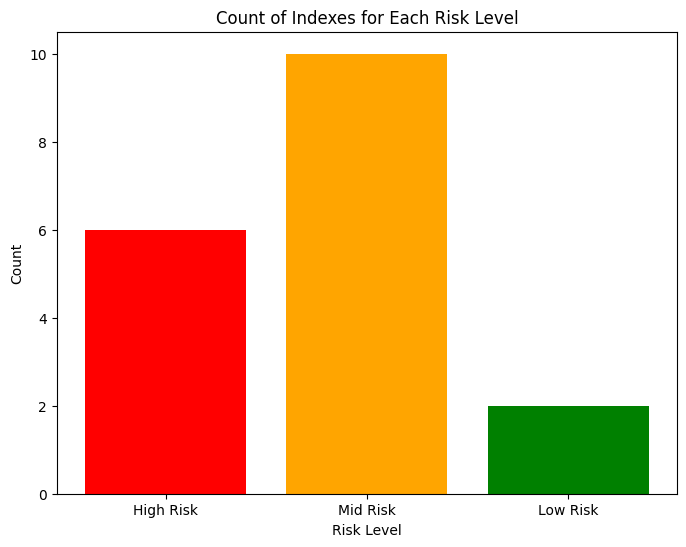

In [32]:
# Count of indexes for each risk level
counts = [len(high_risk_indexes), len(mid_risk_indexes), len(low_risk_indexes)]
risk_labels = ['High Risk', 'Mid Risk', 'Low Risk']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(risk_labels, counts, color=['red', 'orange', 'green'])
plt.title('Count of Indexes for Each Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()
